In [1]:
#imports
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import matplotlib.pyplot as plt
import matplotlib
import os
import pickle
import random 
import operator
import math
import numpy as np
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
from scipy.signal import blackman
from scipy.fft import fft, fftfreq

from miniesn_MBK import *
from numpy.random import randint, uniform, normal
import scipy.sparse as sparse
import scipy.sparse.linalg as sparse_linalg
import scipy.linalg as la

import sys
sys.path.insert(0, '../src/easyesn/')

from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import matplotlib.pyplot as plt

np.random.seed(42)

# %matplotlib widget: make plots interactive
matplotlib.use('nbagg') 
matplotlib.rcParams['figure.figsize']=(24,5)
# matplotlib.rcParams['alpha']=0.6


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

a=0.8

Using Numpy backend.


In [2]:
# dpath = r'C:\Users\MBK\OneDrive\Documents\uni\phd\AppliedMachineLearning2021\AppliedML2021\BigProject\audio\homemade'
desiredfolder=os.path.join('music','genres','classical')
dpath = os.path.abspath(os.path.join(os.path.abspath(''), '..', desiredfolder))
dfiles = os.listdir(dpath)

In [3]:
useMusic=0
if useMusic:
    x, sr = librosa.load(os.path.join(dpath, dfiles[0]))
    waveformTime = np.arange(start=0, stop=len(x)/sr, step=1/sr)
    plt.figure('view waveform')
    librosa.display.waveplot(x,alpha=a)
    ipd.Audio(x, rate=sr)
else:
    inputLength = 10000
    trainingLength = int(inputLength*0.7)
    data = np.linspace(0, 10*np.pi, inputLength).reshape(-1,1)

    f=100
    inputData = np.sin(2*np.pi*f*data) + np.sin(2*np.pi*3*f*data+0.2)# + np.sin(2*np.pi*5*f*data)
    outputData = np.cos(2*np.pi*f*data) + np.cos(2*np.pi*3*f*data)   #+ np.cos(2*np.pi*5*f*data)

    inputDataTraining = inputData[:trainingLength]
    inputDataValidation = inputData[trainingLength:]

    outputDataTraining = outputData[:trainingLength]
    outputDataValidation = outputData[trainingLength:]

esn = PredictionESN(n_input=1, n_output=1, spectralRadius=0.4, n_reservoir=1500, leakingRate=0.2, regressionParameters=[1e-2], solver="lsqr", feedback=False)
esn.fit(inputDataTraining, outputDataTraining, transientTime="Auto", verbose=1)
one_step_prediction = esn.predict(inputDataValidation)

100% (6944 of 6944) |####################| Elapsed Time: 0:00:09 Time:  0:00:09


<IPython.core.display.Javascript object>


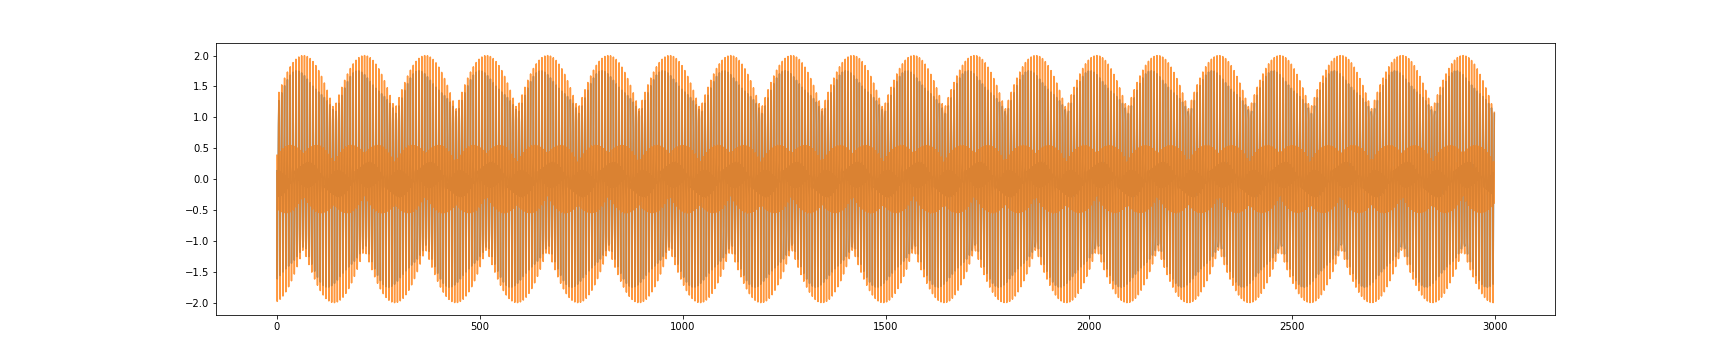

In [10]:
plt.figure()
plt.plot(one_step_prediction.T[0, :],label='prediction',alpha=a)
plt.plot(outputDataValidation,label='validation',alpha=a)
plt.show()

In [145]:
esn = PredictionESN(n_input=0, n_output=1, n_reservoir=150, leakingRate=0.04, spectralRadius=1.1, regressionParameters=[1e-2], solver="lsqr", feedback=True)
esn.fit(None, inputDataTraining, transientTime=100, verbose=1)
generation = esn.generate(n=len(inputDataValidation), inputData=None, initialOutputData=inputDataTraining[-1])

100% (174900 of 174900) |################| Elapsed Time: 0:00:05 Time:  0:00:05


<IPython.core.display.Javascript object>


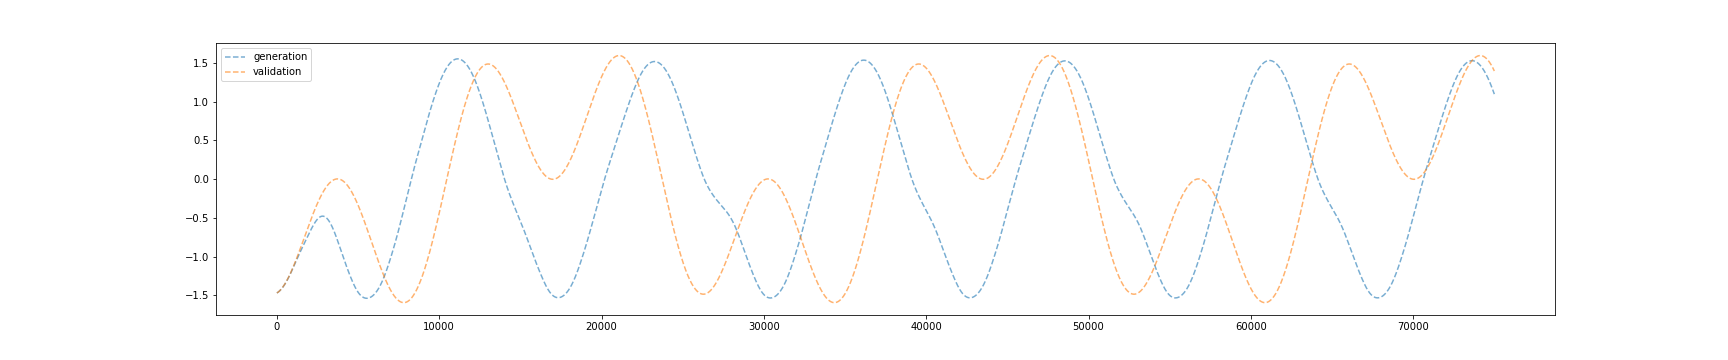

In [141]:
plt.figure()
plt.plot(generation[0, :],alpha=a,linestyle='dashed',label='generation')
plt.plot(inputDataValidation,alpha=a,linestyle='dashed',label='validation')
plt.legend()
plt.show()

In [142]:
# esn = PredictionESN(n_input=1, n_output=1, n_reservoir=50, leakingRate=0.2, spectralRadius=0.2, regressionParameters=[1e-2], solver="lsqr", feedback=True)
opt = GradientOptimizer(esn, learningRate=0.001)

In [143]:
validationLosses, fitLosses, inputScalings, spectralRadiuses, leakingRates, learningRates = opt.optimizeParameterForTrainError(inputDataTraining, 
                                                                                                                               outputDataTraining, 
                                                                                                                               inputDataValidation, 
                                                                                                                               outputDataValidation, 
                                                                                                                               epochs=10, 
                                                                                                                               transientTime=100)


ValueError: Only penalty optimization is supported for a multiple input scalings at the moment. We are working on it.

<IPython.core.display.Javascript object>


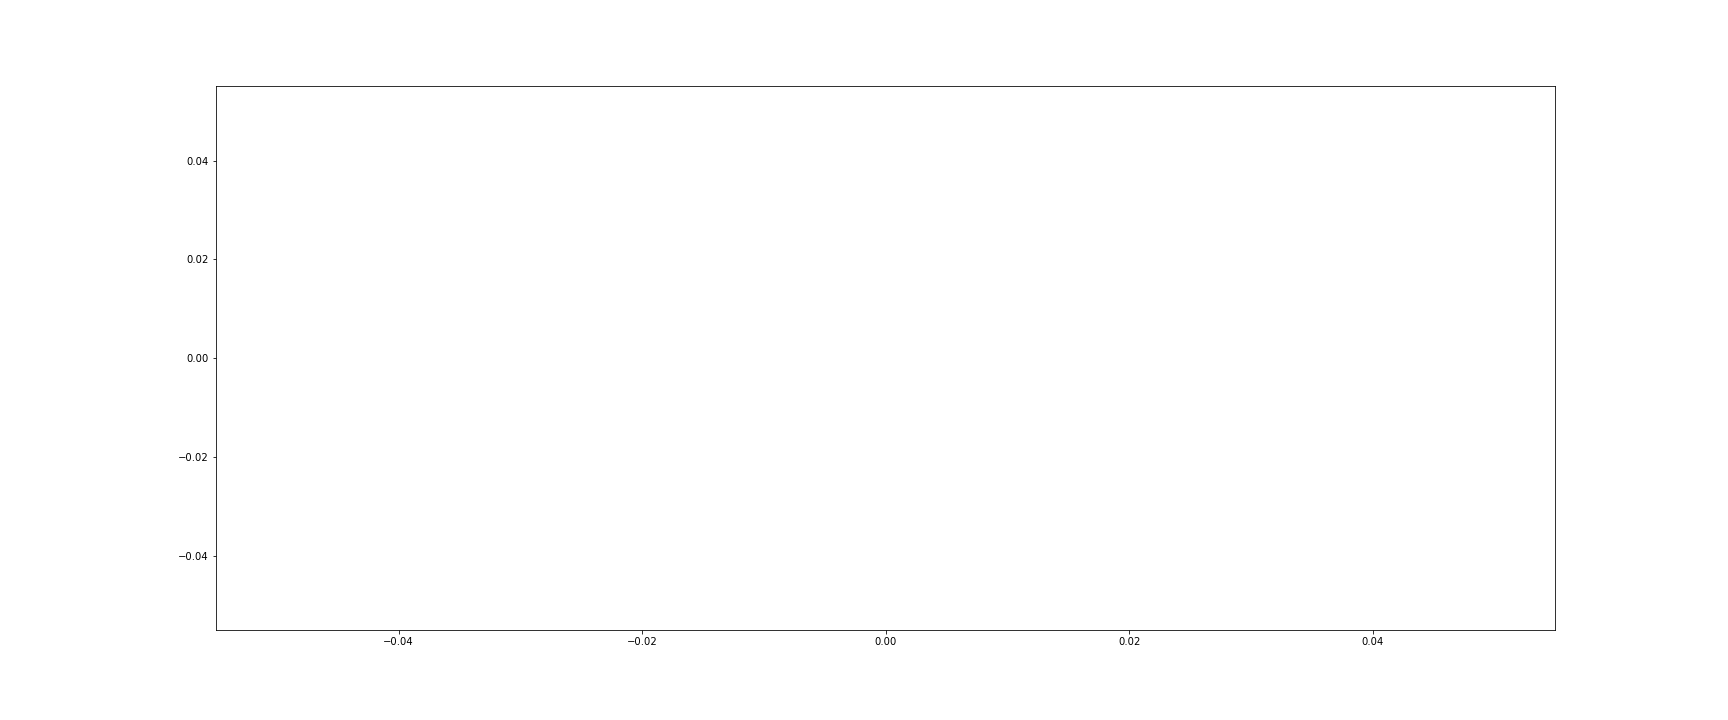

In [130]:
hf=plt.figure(figsize=(24,10))
hf.clf()
ax1=hf.add_subplot(111)

ax1.plot(validationLosses)
# plt.plot(spectralRadiuses)
# plt.show()
# plt.plot(leakingRates)
# plt.show()
# plt.plot(inputScalings)
# plt.show()
# plt.plot(learningRates)
# plt.show()

In [131]:
validationLosses, fitLosses, inputScalings, spectralRadiuses, leakingRates, learningRates

([],
 [],
 [],
 [],
 [],
 [0.0005,
  0.00025,
  0.000125,
  6.25e-05,
  3.125e-05,
  1.5625e-05,
  7.8125e-06,
  3.90625e-06,
  1.953125e-06,
  9.765625e-07])